## Twitter Sentiment
First, load the data into the workspace.

In [88]:
import pandas as pd
import psycopg2
import sys
sys.path.append("../listener")

import private

pd.set_option('display.max_colwidth', -1)

QUERY_GET_DATING_DATA = '''
select
    *,
    case
        when tweet_text ~ 'tinder' or tweet_full_text ~ 'tinder' then 'Tinder'
        when tweet_text ~ 'bumble' or tweet_full_text ~ 'bumble' then 'Bumble'
        when tweet_text ~ 'jswipe' or tweet_full_text ~ 'jswipe' then 'Jswipe'
        when tweet_text ~ 'coffee meets bagel' or tweet_full_text ~ 'coffee meets bagel' then 'Coffee Meets Bagel'
        else 'Unclassified'
end as platform_name
from twitter_sentiment.dating_apps;
'''

with psycopg2.connect(private.AWS_CONNECTION_STRING) as conn:
    df = pd.read_sql(
        sql = QUERY_GET_DATING_DATA,
        con = conn
    )

### Sentiment Analysis
Use the vader package to assign sentiment to each tweet.

In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

print('Tinder: ' + str(analyser.polarity_scores("I love Tinder, so much fun!")))
print('Jswipe: ' + str(analyser.polarity_scores("All the best people are on Jswipe")))
print('Bumble: ' + str(analyser.polarity_scores("Are you F&%$ing kidding me??? Bumble is terrible!!!")))

Tinder: {'neg': 0.0, 'neu': 0.271, 'pos': 0.729, 'compound': 0.843}
Jswipe: {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
Bumble: {'neg': 0.379, 'neu': 0.504, 'pos': 0.117, 'compound': -0.6269}


In [80]:
def get_sentiment(text):
    '''Take text, return positive sentiment score'''
    return analyser.polarity_scores(text)['compound']

df_clean = df[['tweet_created_at','tweet_text','tweet_full_text', 'platform_name']][df['tweet_language']=='en']
df_clean['sentiment_compound'] = df_clean['tweet_text'].apply(get_sentiment)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ce51250>]],
      dtype=object)

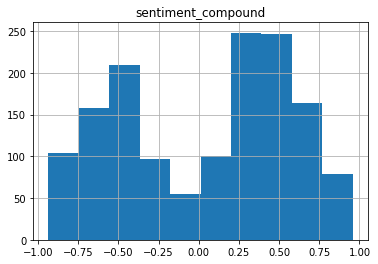

In [77]:
df_clean[df_clean['sentiment_compound'] != 0].hist()

In [89]:
(df_clean.
    sort_values(by = ['sentiment_compound'], ascending=False).
    head()[['tweet_text', 'sentiment_compound', 'platform_name']])

,tweet_text,sentiment_compound,platform_name
278,@thismommyrocksR @jaymohr37 @Tinder My heart is so happy! Congratulations wonderful you. You having an amazing soul… https://t.co/tKJscJXYU1,0.9582,Unclassified
5787,"This dude I swiped yes on Super Liked me on Tinder, but he hasn't messaged me. Why are you gonna Super Like me if y… https://t.co/HksvRFMBGA",0.9300,Unclassified
760,i just had a really nice afternoon with a guy i met on tinder\n\nhes super cute and i like him!!! i took this picture… https://t.co/JwW5MrR7bO,0.9242,Tinder
4904,Eu girl Dating Tinder Sexual babe Date ? sex singles lady Beautiful For free Nz passion Friends Teen colorado Chick… https://t.co/GjHucIQkgA,0.9231,Unclassified
2989,matched with a guy on tinder who really isn’t my type personality wise but he’s really cute lmao,0.9225,Tinder


In [91]:
(df_clean.
    sort_values(by = ['sentiment_compound'], ascending=True).
    head()[['tweet_text', 'sentiment_compound','platform_name']])

,tweet_text,sentiment_compound,platform_name
664,RT @n_direct: Serial killer Deku and Serial killer Bkg meeting up using Tinder w/ plans to kill each other. Neither knows that the other is…,-0.936,Unclassified
207,RT @n_direct: Serial killer Deku and Serial killer Bkg meeting up using Tinder w/ plans to kill each other. Neither knows that the other is…,-0.936,Unclassified
3197,RT @n_direct: Serial killer Deku and Serial killer Bkg meeting up using Tinder w/ plans to kill each other. Neither knows that the other is…,-0.936,Unclassified
6124,RT @n_direct: Serial killer Deku and Serial killer Bkg meeting up using Tinder w/ plans to kill each other. Neither knows that the other is…,-0.936,Unclassified
3195,RT @n_direct: Serial killer Deku and Serial killer Bkg meeting up using Tinder w/ plans to kill each other. Neither knows that the other is…,-0.936,Unclassified
